In [1]:
# TRAVELLING SALESMAN (Algorithm with raw calculation)
# from Finnish airports

# INIT
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import math
from itertools import permutations 
%matplotlib inline   
import warnings    
warnings.filterwarnings("ignore", category=UserWarning)

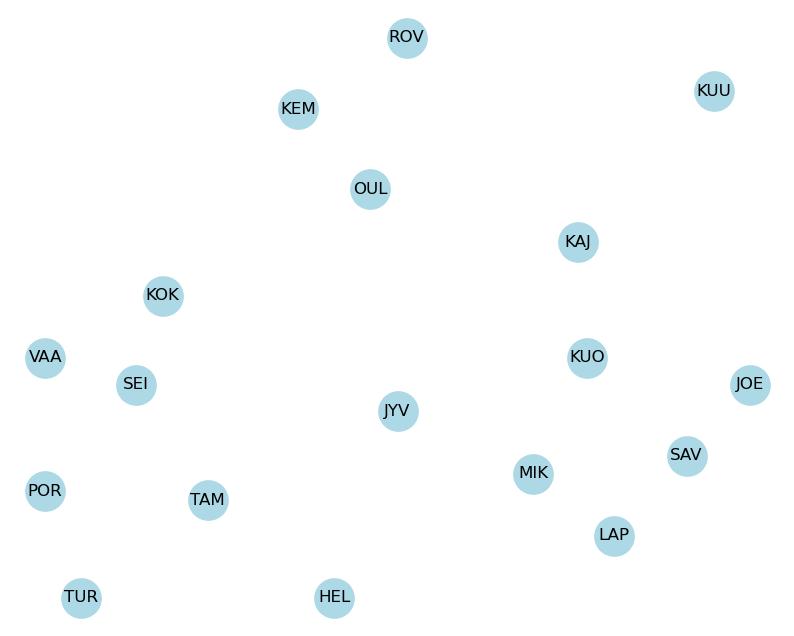

Choose the cities to visit (Use a space as separator): 
TUR JYV LAP SEI KOK JOE HEL KAJ KUO JOE
Let's find the shortest route that goes through these cities:
['TUR', 'JYV', 'LAP', 'SEI', 'KOK', 'JOE', 'HEL', 'KAJ', 'KUO', 'JOE']


In [2]:
# CREATION OF THE CITY NETWORK
G = nx.Graph()            # Create a graph instance
nlst = list(range(0,18))  # List of numbers from 0 to 17
G.add_nodes_from(nlst)    # Add nodess from the list 

# Nodelabels are set as a dictionary:
labels = {0:'HEL', 1:'JOE', 2:'JYV', 3:'KAJ', 4:'KEM', 5:'KOK', 6:'KUO', 7:'KUU', 8:'LAP',\
          9:'MIK', 10:'OUL', 11:'POR', 12:'ROV', 13:'SAV', 14:'SEI', 15:'TAM',16: 'TUR', 17:'VAA'}

# Airport locations (N,E)
posit = {0:(60.317222, 24.963333),  1:(62.658889, 29.624444),  2:(62.400833, 25.672778),\
         3:(64.284167, 27.6875),    4:(65.779167, 24.584722),  5:(63.720278, 23.139167),\
         6:(63.008611, 27.794444),  7:(65.990278, 29.231944),  8:(61.045833, 28.148611),\
         9:(61.686389, 27.2),      10:(64.929167, 25.355556), 11:(61.461389, 21.797778),\
        12:(66.561667, 25.830833), 13:(61.942778, 28.945),    14:(62.693611, 22.831944),\
        15:(61.415278, 23.587778), 16:(60.514722, 22.261667), 17:(63.045278, 21.764167)} 

# Node positions for plotting from coordinates (E,N) by omitting 1 number (e.g. 65.7->5.7): 
pos = {0:(5.0, 0.3), 1:(9.6, 2.7), 2:(5.7, 2.4), 3:(7.7, 4.3),  4:(4.6, 5.8),  5:(3.1, 3.7),\
      6:(7.8, 3.0), 7:(9.2, 6.0), 8:(8.1, 1.0), 9:(7.2, 1.7), 10:(5.4, 4.9), 11:(1.8, 1.5),\
      12:(5.8, 6.6), 13:(8.9, 1.9), 14:(2.8, 2.7),15:(3.6, 1.4), 16:(2.2, 0.3), 17:(1.8, 3.0) }

# Draw the nodes:
plt.rcParams["figure.figsize"] = [10, 8]    
nx.draw_networkx(G,
        pos = pos,                        # Nodepositions from the 'pos'-dictionary
        node_size = 800,           
        node_color= 'lightblue',    
        font_color= 'k',            
        edge_color= 'gray',         
        with_labels= False,)             # Node labels are printed separately 
nx.draw_networkx_labels(G, pos, labels)  # Node labels are printed from  dictionary 'labels'
plt.axis("off")                          # No frames around the picture                               
plt.show()

# Which cities are visited: (v)
print('Choose the cities to visit (Use a space as separator): ')
cit = input()
cit = cit.upper()            # Response string in uppercase letters
cits = list(cit.split())     # List of cities
cities=[]                    # Kaupunkilista numeroin
# Let's extract the keys (0, 6,..) corresponding to the values (HEl, KUO,..)
# from the dictionary 'labels' into a list:
for c in cits:
    nde = list(labels.keys())[list(labels.values()).index(c)] 
    cities.append(nde)

print("Let's find the shortest route that goes through these cities:")
print(cits)     

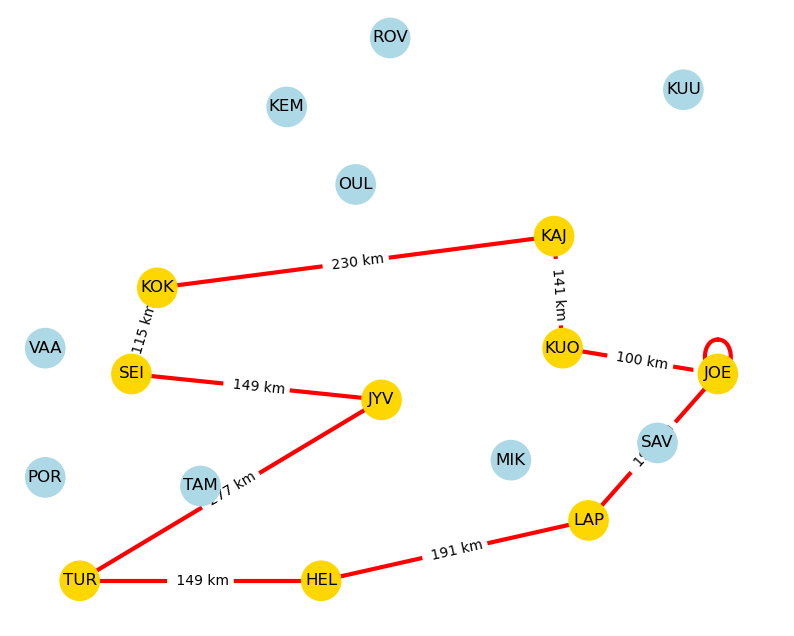

The shortest round is ['TUR', 'JYV', 'SEI', 'KOK', 'KAJ', 'KUO', 'JOE', 'JOE', 'LAP', 'HEL', 'TUR'] 1547 km


In [3]:
# ALL POSSIBLE CIRCULAR ROUTES ARE FORMED FROM CITIES

# Routes that go around the selected cities and return to the starting point. The opposite
# directions of rotation are included separately, and they are later removed as the same length:
# Permuting all different city orders -> list of lists
cycles = [cities[:1]+ list(perm) for perm in permutations(cities[1:])]  

# Since we are going back to the starting point 'cities[0]', we add it to each path last:
for x in cycles:
    x.extend([cities[0]]) 
    # The 1st member of the 'cities' list is added to the element lists of the 'cycles' list

# Generate (n-1)! path, two of which are always the same length in opposite directions.
# (4! = 24,  6! = 720,  8! = 40 320,   10! = 3 628 800,  12! = 479 001 600)
#print(cycles)
#print(len(cycles))


# DISTANCE Between Two Points on Earth
from math import radians, cos, sin, asin, sqrt
def distance(lat1, lat2, lon1, lon2):
    # Degrees to radians (from math module):
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * asin(sqrt(a))
    r = 6371                 # Radius of earth in kilometers.    
    return(c * r)            # Calculate the result
 
#----------------    
#Esim. driver code
#lat1 = 60.317222
#lat2 = 63.008611
#lon1 = 24.963333
#lon2 = 27.794444
#print('HEL-KUO', int(distance(lat1, lat2, lon1, lon2)), "km")
## Output: HEL-KUO 334 km

# A new complete sub-network H of G is created from the cities selected to be visited.
H = nx.Graph()
H.add_nodes_from(cities)                   

# Distances between cities are calculated. Set between cities with distances weighted edges.
# Complete graph is generated.
for i in range(len(cities)-1):               
    for j in range(i+1, len(cities)):
        a = cities[i]                       # The i:th element of the 'cities' list
        b = cities[j]                       # The j:th element of the 'cities' list
        #print(posit[a][0], posit[a][1],' ', posit[b][0], posit[b][1])
        dist = distance(posit[a][0], posit[b][0], posit[a][1], posit[b][1])
        dist = int(dist)                    
        H.add_edge(a,b, weight=dist)        # The weight is the distance between cities a and b.


#print(H.nodes)
#print(H.edges)

# print('HEL-KUO', H.edges[0,6]['weight'], 'km') # HEL-KUO [0,6]: 334 km  

#n = len(cities)                          # Number of cities
#print(n, 'cities')
#print(int(n*(n-1)/2))                    # the theoretical number of arcs of a complete graph of n nodes.
#print(len(H.edges))                      # Number of arcs in graph H. 
#print(int(n*(n-1)/2) == len(H.edges))    # Theoretical number of arcs. vs. the number of arcs of H.
#print(cycles)

# Calculate the length of the given circular path: 
solut_lenght = 99999
solut_path =[]
for path in cycles:
    path_lenght = 0
    for node, nbr in nx.utils.pairwise(path):
        # print(H.edges[node,nbr]['weight']) 
        path_lenght += H.edges[node,nbr]['weight']
    #print(path_lenght)         
    if path_lenght < solut_lenght:
        solut_lenght = path_lenght
        solut_path   = path
        
# The nodes of the solution path are colored with 'dodgerblue'
for n in G.nodes:
    if n in solut_path[:-1]:
        G.nodes[n]['color']= 'gold'
    else:
        G.nodes[n]['color']= 'lightblue'
        
ncols = nx.get_node_attributes(G, 'color').values()  # For printing 
#print(ncols)

#print('The solution path is', solut_path,  solut_lenght, 'km' )

shortest_route = []
for i in solut_path:
    shortest_route.append(labels[i])
#print('The shortest round is', shortest_route, solut_lenght, 'km')

# Add the edges of the solution path to network G:
for n1, n2 in nx.utils.pairwise(solut_path):
    G.add_edge(n1, n2, weight= H.edges[n1,n2]['weight'],)
    #print(n1, n2, G.edges[n1,n2]['weight'])

# Draw a network in which the shortest circuit is marked with intermediate distances:
plt.rcParams["figure.figsize"] = [10, 8]    
nx.draw_networkx(G,
        pos = pos,                  # Nodepositions
        node_size = 800,            
        #alpha = 0.6,               # Transparency of the nodes
        node_color = ncols,         
        #node_color= 'lightblue',   
        font_color= 'k',            # In nodes
        edge_color= 'red',          
        width = 3,
        with_labels= False,)        # Node labels will be printed separately from the dictionary.

nx.draw_networkx_labels(G, pos, labels) # Printing nodelabels from the 'labels' dictionary
plt.axis("off")                     # Does not draw frames around the picture

# Edgelabels
# Create a dictionary 'edge_weight', where the key is edge and..
# as the value of its edge 'weight' (= distance between cities):      
edge_weight = nx.get_edge_attributes(G,'weight') 
# Edgelabels are given for drawing as a dictionary:
elabs = dict([((u,v), f' {edge_weight[u,v]} km')  for u,v in G.edges]) 
# Including edge labels in the drawing
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels = elabs) 
plt.axis("off")           # No frames around the picture                               
plt.show()

plt.show()
print('The shortest round is', shortest_route, solut_lenght, 'km')